### Deepak Arumugam Vivekanandan - deep199907@gmail.com

In [1]:
import pandas as pd

# Load the dataset from the uploaded Excel file
file_path = "C:/Users/deep1/Downloads/godigt_cc_data.xlsx"
df = pd.read_excel(file_path)

# Display basic info and the first few rows to understand the data
df.head()



,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

## 2. Data Collection & Understanding

In [3]:


# Check for missing values
missing_values = df.isnull().sum()

# Understand variable types
categorical_vars = ['card_type', 'Occupation_at_source', 'Transactor_revolver']
numerical_vars = ['cc_limit', 'avg_spends_l3m', 'annual_income_at_source']
date_vars = ['card_source_date']

# Print summary
print("\nCategorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)
print("Date Variables:", date_vars)
print("\nMissing Values:\n", missing_values)



Categorical Variables: ['card_type', 'Occupation_at_source', 'Transactor_revolver']
Numerical Variables: ['cc_limit', 'avg_spends_l3m', 'annual_income_at_source']
Date Variables: ['card_source_date']

Missing Values:
 userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
O

## Exploratory Data Analysis (EDA)

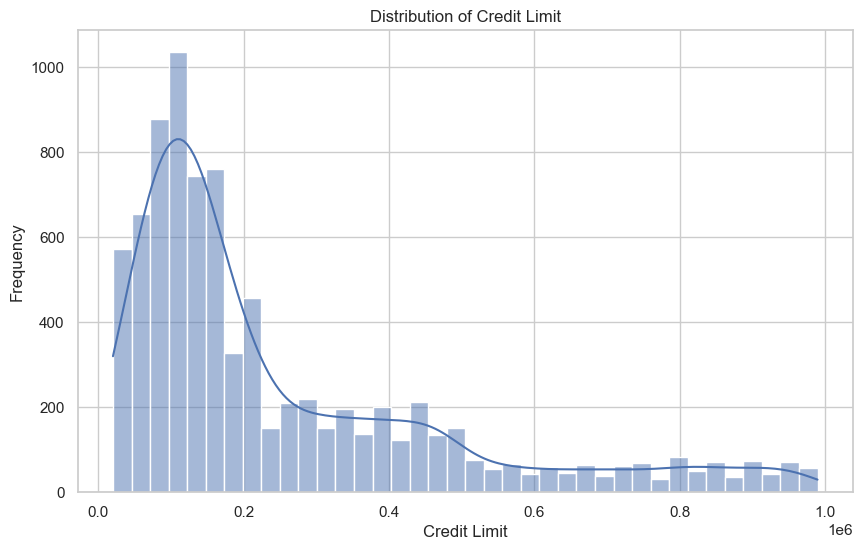

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Convert target column to categorical (drop NaNs temporarily for EDA)
eda_df = df.dropna(subset=["Transactor_revolver"])

# 1. Distribution plots for credit limit
plt.figure(figsize=(10, 6))
sns.histplot(eda_df["cc_limit"], kde=True)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()



### Inference: Credit Limit Distribution
* The distribution is right-skewed, meaning most customers have smaller credit limits.

* Majority of credit limits fall below ₹2,00,000, indicating a conservative credit assignment for most users.

* The number of customers decreases sharply as credit limits increase.

* A small segment of users holds very high limits (above ₹5,00,000), likely representing premium or low-risk clients.

* This skewed pattern suggests the presence of potential outliers at the higher end.

* Data transformations (like normalization or log scaling) may be helpful during model preparation.

* Such a distribution is typical in banking, where higher credit limits are selectively given based on income or creditworthiness.

### Annual Income Distribution

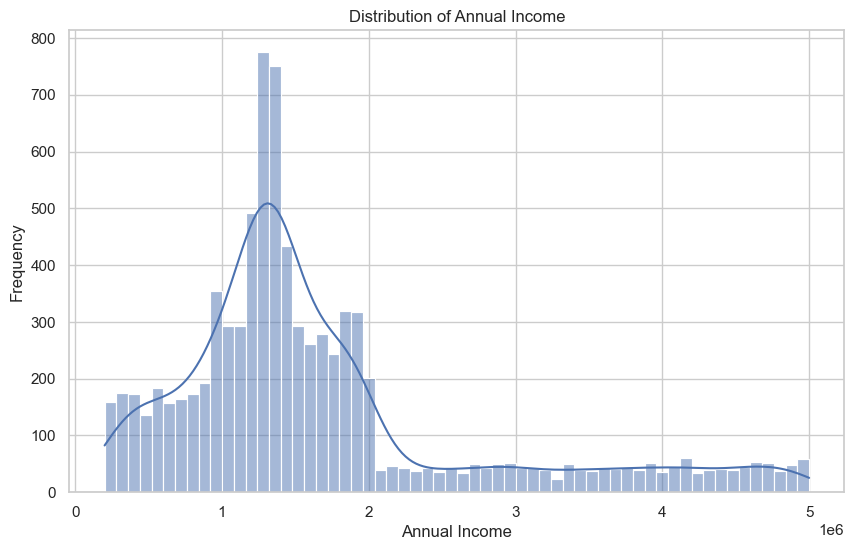

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df["annual_income_at_source"], kde=True)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()



## Inference: Annual Income Distribution
* The distribution of annual income is positively skewed, with most customers earning on the lower to mid-income spectrum.

* A large concentration of users report incomes around ₹1.2 to ₹1.5 million, forming a noticeable peak.

* Beyond ₹2 million, the number of customers drops sharply, indicating fewer high-income individuals.

* There are a few outliers with very high incomes (up to ₹5 million), which could influence modeling if not properly handled.

* The wide income range suggests that the dataset includes a diverse customer base, from moderate to affluent earners.

* This pattern aligns with real-world banking data, where high-income customers are fewer but strategically important.

* Log transformation or binning may be considered to handle skewness before training models.

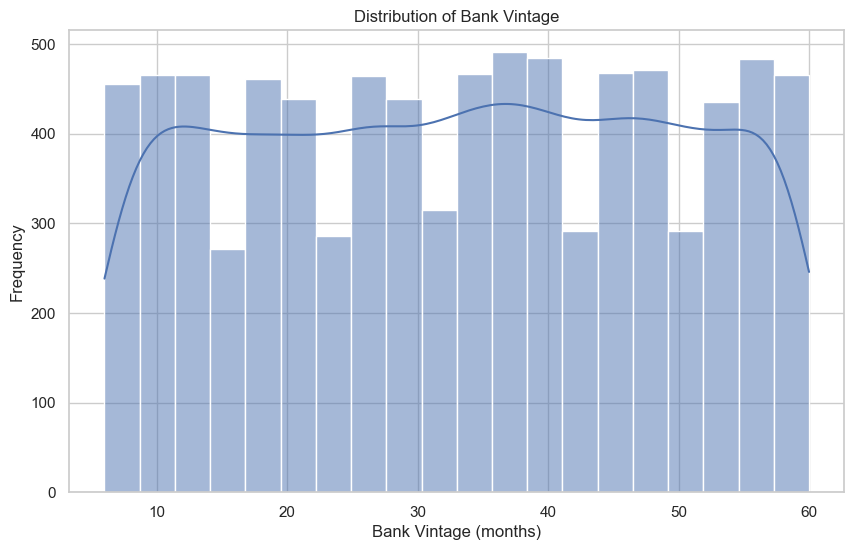

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df["bank_vintage"], kde=True)
plt.title("Distribution of Bank Vintage")
plt.xlabel("Bank Vintage (months)")
plt.ylabel("Frequency")
plt.show()



### Inference : : Bank Vintage Distribution
#### 1. Overall Shape
The distribution is fairly uniform, meaning customers are spread across different vintage ranges from 6 to 60 months.

This suggests a steady acquisition rate over time with no extreme skews toward newer or older customers.

#### 2. Notable Patterns
There are slight peaks in the 36–40 month range, possibly due to common credit card renewal cycles or campaign effects during that period.

Dips in frequency appear intermittently, which might hint at churn periods or reduced onboarding during certain months.

#### 3. Customer Relationship Insights
The spread shows that the data includes customers at various stages in their banking lifecycle, from new to long-term users.

This makes bank_vintage a potentially useful feature for segmentation or risk modeling.

#### 4. Modeling Implications
Since bank vintage reflects customer tenure, it may help in identifying loyal customers or predicting default risk based on historical behavior.

The fairly balanced distribution suggests that no major resampling or transformation is needed for this variable.

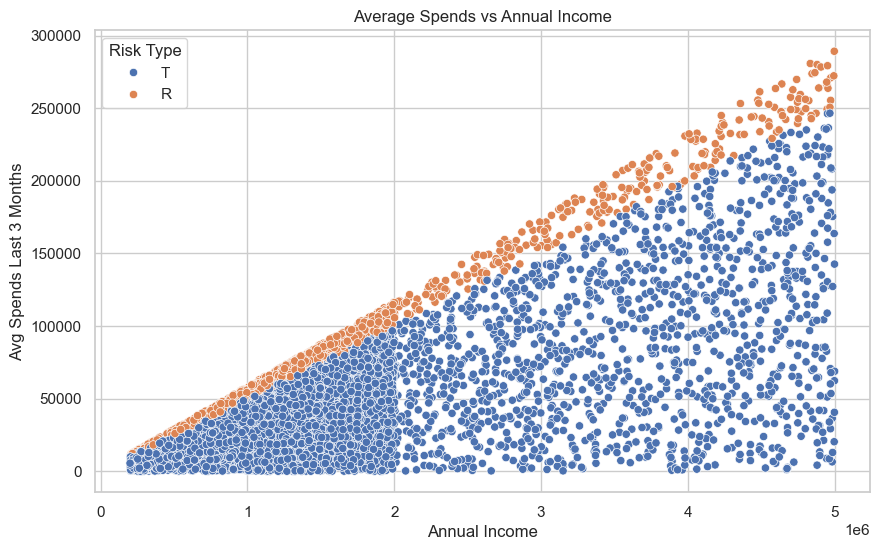

In [7]:
# 2. Spending vs Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eda_df, x="annual_income_at_source", y="avg_spends_l3m", hue="Transactor_revolver")
plt.title("Average Spends vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Avg Spends Last 3 Months")
plt.legend(title="Risk Type")
plt.show()



### Inference: Spend Behavior vs Annual Income (Segmented by Risk Profile)
#### 1. Customer Spend-Income Relationship
* The scatter plot demonstrates a direct correlation between annual income and average monthly credit card spend.
* Higher-income customers tend to exhibit increased transactional volume, reflecting greater purchasing power.

#### 2. Risk Profile Segmentation: Transactors vs Revolvers
* Revolvers (R), who carry forward balances and pay interest, consistently show higher utilization of available credit, even at comparable income levels.
* Transactors (T), who pay off their full balance each cycle, exhibit lower average spends, indicative of prudent credit usage and cash-flow discipline.
* This divergence implies differing credit risk appetites and spending behaviors between the two segments.

#### 3. Portfolio Insights
* The revolver segment may contribute more to interest income but also pose a higher default probability due to aggressive credit utilization.
* Transactors, while yielding lower interest revenue, are lower-risk customers with better repayment behavior — ideal for cross-sell opportunities (e.g., investments, insurance).

####4. Feature Engineering Implications
* A derived metric like credit card spend-to-income ratio or monthly utilization rate may enhance model predictability.
* The clear separation between T and R behavior highlights spend patterns as a significant predictor of customer credit risk.

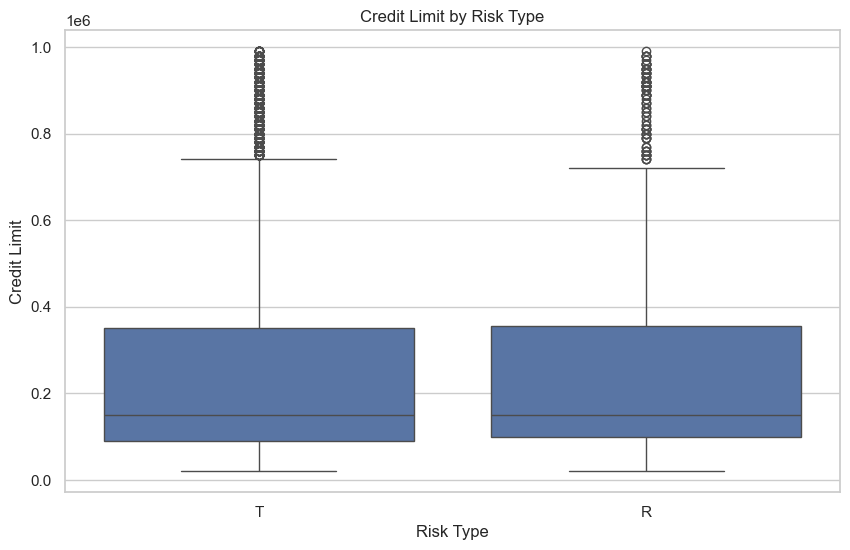

In [8]:

# 3. Limit vs Risk Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda_df, x="Transactor_revolver", y="cc_limit")
plt.title("Credit Limit by Risk Type")
plt.xlabel("Risk Type")
plt.ylabel("Credit Limit")
plt.show()


### Credit Limit Distribution by Risk Profile
#### 1. Comparative Overview
The boxplot illustrates the distribution of credit limits between two customer segments:
* Transactors (T) – customers who pay their dues in full.
* Revolvers (R) – customers who carry forward balances and incur interest.
* Both groups exhibit a similar median credit limit, suggesting a largely consistent initial credit allocation strategy across risk profiles.

#### 2. Distribution and Outliers
* Both risk types have a wide interquartile range (IQR), indicating high variability in assigned credit limits.
* A significant number of high-value outliers are present, especially in the upper tail (₹700,000 and above), likely representing premium or high net-worth individuals.
* These outliers may also reflect custom limit enhancements over time based on income, repayment track record, or relationship value.

#### 3. Risk Appetite and Credit Strategy Implications
* While median limits are aligned, slightly higher upper quartiles for revolvers may indicate greater risk exposure if these customers default.
* Revolvers’ higher limits coupled with revolving balances could lead to increased credit risk, though they also offer higher interest income potential.
* Transactors, though lower on interest yield, contribute to portfolio stability and lower delinquency rates.

#### 4. Use in Risk Modeling
* Credit limit is a critical feature influencing utilization ratio, a known predictor of probability of default (PD).
* For modeling purposes, high-limit outliers may need treatment (e.g., capping or log transformation) to avoid distortion in learning algorithms.

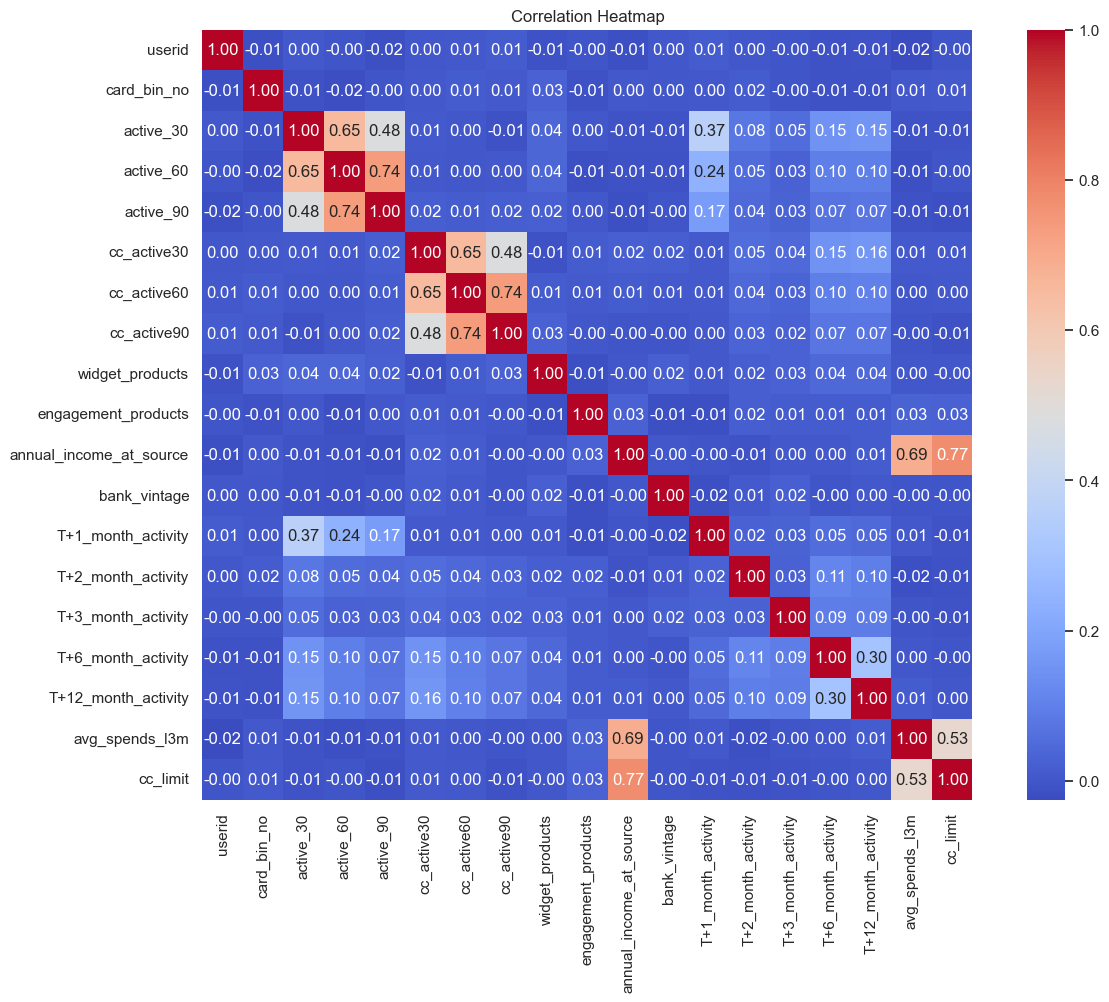

In [9]:

# 4. Correlation heatmap (only numerical features)
corr = eda_df.select_dtypes(include='number').corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Heatmap of Numerical Features
#### 1. Strong Positive Correlations
* Activity Metrics (active_30/60/90 vs cc_active_30/60/90)
* Strong correlations (≥ 0.65) among these variables reflect that credit card activity closely mirrors general account activity over similar time periods.
* This is expected, as customers actively using their cards are likely to be engaging more across digital and product channels.

##### Annual Income vs Credit Limit (0.77)
* A high correlation suggests that credit limits are proportionately aligned with declared income, adhering to internal credit policy or underwriting rules.
* This aligns with risk-based lending practices where repayment capacity drives limit allocation.
    
##### Annual Income vs Avg Spends (0.69)
*Indicates that higher-income customers tend to spend more on credit cards, consistent with lifestyle-based segmentation in retail banking.

#### 2. Moderate Correlations
* Avg Spends vs Credit Limit (0.53)
* Suggests that customers with higher credit limits generally utilize more, but not in a strictly linear fashion.
* Could indicate that utilization ratios vary, supporting the inclusion of such derived metrics in predictive modeling.

#### 3. Low to Negligible Correlations
* Features like card_bin_no, widget_products, and engagement_products show very weak correlations, indicating they may not be strong predictors in isolation.
* bank_vintage shows almost no linear correlation with other variables but might still carry predictive value through non-linear patterns or interactions.

#### 4. Modeling Considerations
* Highly correlated features may introduce multicollinearity in linear models (e.g., logistic regression), suggesting the need for dimensionality reduction (e.g., PCA) or regularization techniques (e.g., Lasso/Ridge).
* Alternatively, tree-based algorithms (e.g., Random Forest, XGBoost) can naturally handle these correlations without performance degradation.



In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Handling Missing values, Label encoding and Normalization 

In [11]:

# Step 1: Handle missing values (drop rows with missing target)
df_cleaned = df.dropna(subset=["Transactor_revolver"]).copy()

# Step 2: Drop uninformative columns
df_cleaned.drop(columns=["userid", "card_no"], inplace=True)

# Step 3: Label encode categorical variables
categorical_cols = [
    "card_type",
    "Occupation_at_source",
    "Transactor_revolver",
    "Issuer",
    "high_networth",
    "hotlist_flag",
    "other_bank_cc_holding"
]

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype(str)
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Step 4: Normalize/scale numerical features
scaler = StandardScaler()
numeric_cols = ["cc_limit", "avg_spends_l3m", "annual_income_at_source"]
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])


### Feature Engineering

In [12]:
import numpy as np
from datetime import datetime

# Engagement score: sum of last 3 months' activity
df_cleaned["engagement_score"] = df_cleaned["active_30"] + df_cleaned["active_60"] + df_cleaned["active_90"]

# Spend-to-limit ratio
df_cleaned["spend_to_limit_ratio"] = df_cleaned["avg_spends_l3m"] / (df_cleaned["cc_limit"] + 1e-6)

# Income tier based on annual income (you can adjust thresholds as needed)
df_cleaned["income_tier"] = pd.cut(
    df_cleaned["annual_income_at_source"],
    bins=[-np.inf, 500000, 1500000, 3000000, np.inf],
    labels=["Low", "Middle", "Upper-Middle", "High"]
)

# Convert 'income_tier' to numeric labels
df_cleaned["income_tier"] = LabelEncoder().fit_transform(df_cleaned["income_tier"].astype(str))

# Card tenure in months (based on today's date)
today = pd.to_datetime(datetime.today())
df_cleaned["card_tenure_months"] = (today - df_cleaned["card_source_date"]).dt.days // 30
df_cleaned

,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,...,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,engagement_score,spend_to_limit_ratio,income_tier,card_tenure_months
0,438439,2,4,2019-09-29,1,0,1,1,0,0,...,0,0,1,-0.476399,4,0.167712,2,-2.840554,0,69
1,437748,2,10,2002-10-30,0,1,1,1,0,0,...,0,0,0,4.999380,0,3.049143,3,1.639601,0,275
2,437748,2,12,2013-10-05,2,0,0,0,0,0,...,0,0,0,0.450736,5,-0.181552,0,-2.482694,0,142
3,425806,2,7,1999-06-01,4,0,1,1,1,1,...,0,0,1,-0.878183,4,-0.749107,2,1.172308,0,317
4,437748,2,4,2006-06-13,1,1,1,1,0,1,...,0,0,1,-0.251873,3,-0.137894,3,1.826582,0,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,426241,2,3,2010-01-10,0,1,1,1,0,0,...,0,0,1,1.275504,0,3.136460,3,0.406670,0,187
8444,376916,0,2,2006-07-19,0,0,1,1,0,1,...,0,0,1,-0.159696,3,-0.225210,2,0.709101,0,230
8445,437551,2,12,2006-02-15,3,0,1,1,0,0,...,0,0,1,-0.893261,2,-0.705449,2,1.266233,0,235
8446,447747,2,7,2003-11-06,2,0,0,0,0,0,...,0,0,1,0.158975,3,-0.181552,0,-0.875652,0,263


In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the original data
X = df_cleaned.drop(["Transactor_revolver", "card_source_date"], axis=1)
y = df_cleaned["Transactor_revolver"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_smote, y_train_smote)
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print(" Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr, target_names=["Transactor", "Revolver"]))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")

 Logistic Regression Report:

              precision    recall  f1-score   support

  Transactor       0.42      0.65      0.51       259
    Revolver       0.93      0.84      0.88      1423

    accuracy                           0.81      1682
   macro avg       0.68      0.74      0.70      1682
weighted avg       0.85      0.81      0.82      1682

ROC-AUC: 0.8610


C:\Users\deep1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


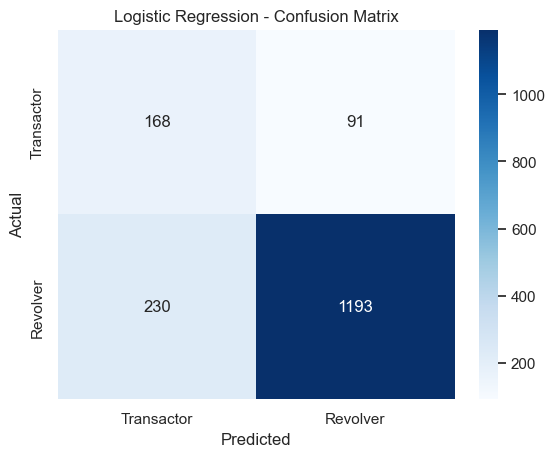

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Transactor", "Revolver"], yticklabels=["Transactor", "Revolver"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

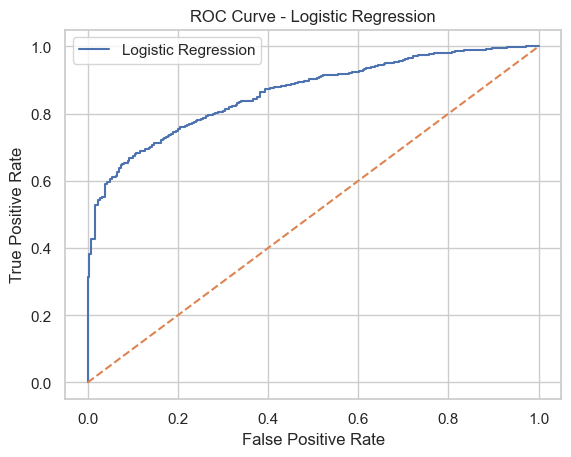

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

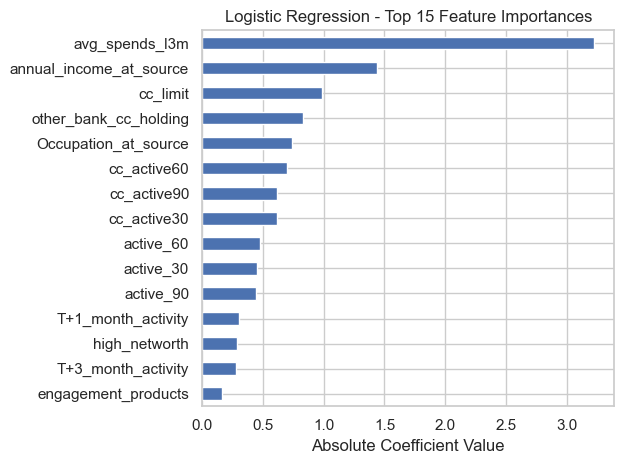

In [17]:
# Get feature names and corresponding coefficients
feature_importance_lr = pd.Series(np.abs(lr_model.coef_[0]), index=X_train.columns)

# Plot top 15 most influential features
feature_importance_lr.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title("Logistic Regression - Top 15 Feature Importances")
plt.xlabel("Absolute Coefficient Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

C:\Users\deep1\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\deep1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\deep1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\deep1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature

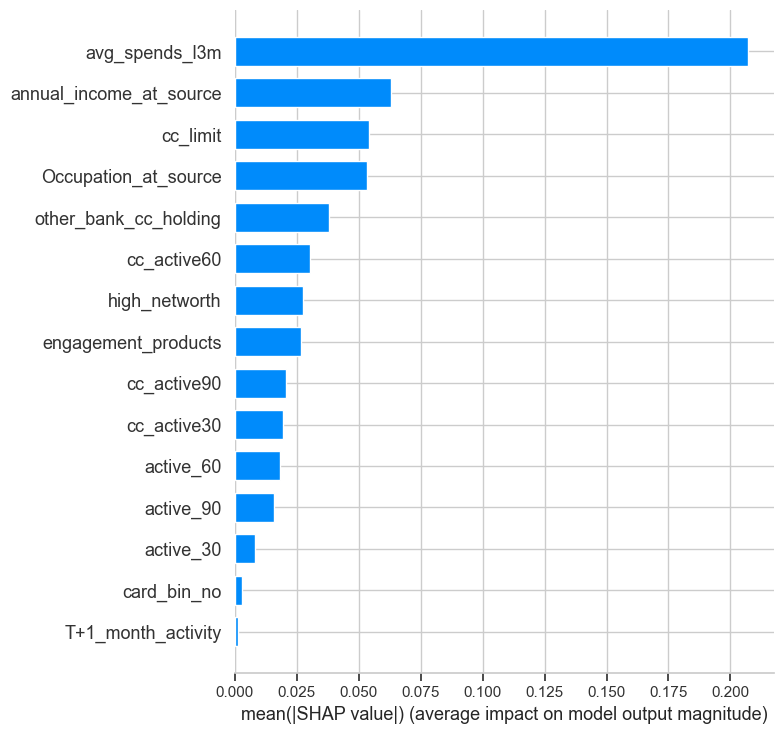

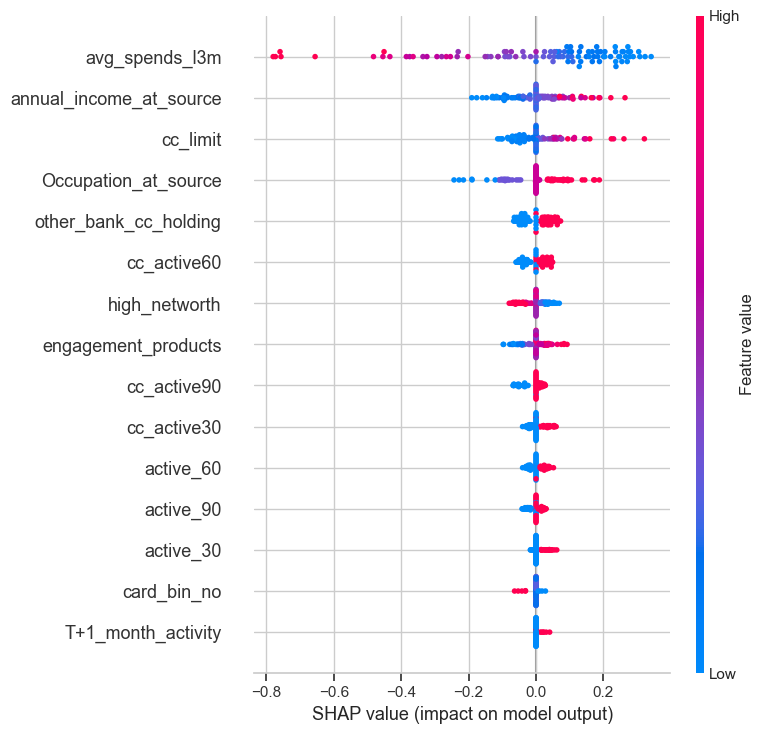

In [18]:
import shap

# Sample subset of test data for performance
X_sample = X_test.sample(100, random_state=42)

# Define the prediction function (probability of class 1 only)
def model_predict(X):
    return lr_model.predict_proba(X)[:, 1]

# Use KernelExplainer for linear models
explainer = shap.KernelExplainer(model_predict, X_sample)

# Compute SHAP values for same sample
shap_values = explainer.shap_values(X_sample)

# Summary plot - global interpretation
shap.summary_plot(shap_values, X_sample, plot_type="bar", max_display=15)
shap.summary_plot(shap_values, X_sample, max_display=15)


### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(" Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=["Transactor", "Revolver"]))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")

 Random Forest Report:

              precision    recall  f1-score   support

  Transactor       0.70      0.81      0.75       259
    Revolver       0.96      0.94      0.95      1423

    accuracy                           0.92      1682
   macro avg       0.83      0.87      0.85      1682
weighted avg       0.92      0.92      0.92      1682

ROC-AUC: 0.9602


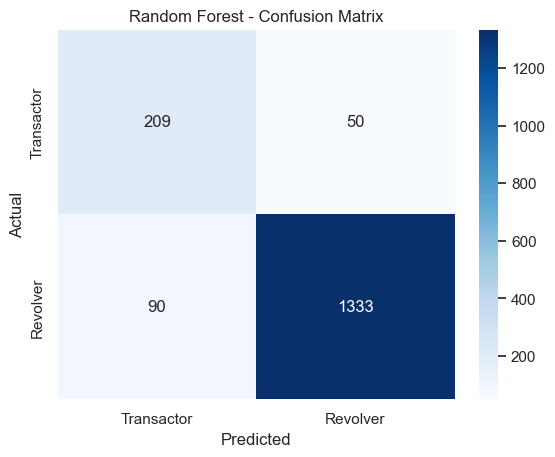

In [20]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Transactor", "Revolver"], yticklabels=["Transactor", "Revolver"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

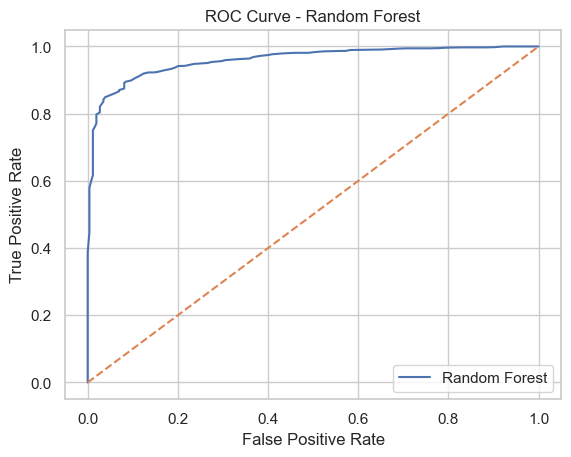

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

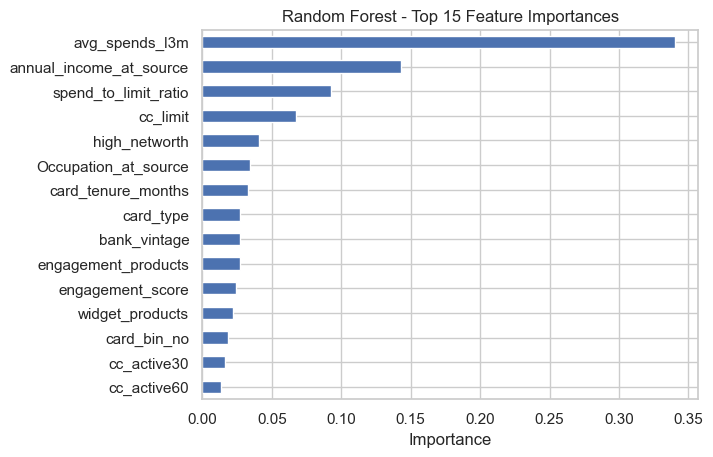

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance_rf.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title("Random Forest - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

### XGBoost

In [23]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(" XGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=["Transactor", "Revolver"]))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_xgb):.4f}")

 XGBoost Report:

              precision    recall  f1-score   support

  Transactor       0.91      0.96      0.93       259
    Revolver       0.99      0.98      0.99      1423

    accuracy                           0.98      1682
   macro avg       0.95      0.97      0.96      1682
weighted avg       0.98      0.98      0.98      1682

ROC-AUC: 0.9970


C:\Users\deep1\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [00:21:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


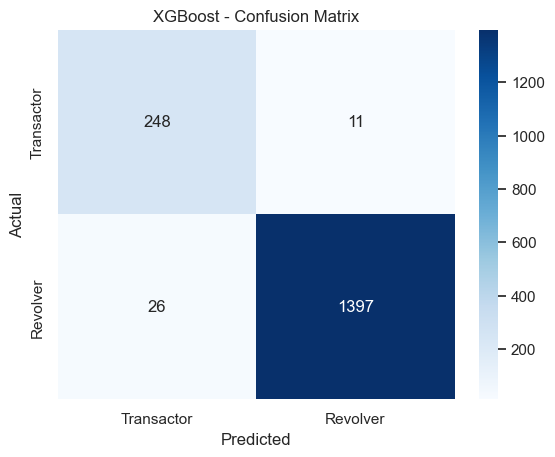

In [24]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Transactor", "Revolver"], yticklabels=["Transactor", "Revolver"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

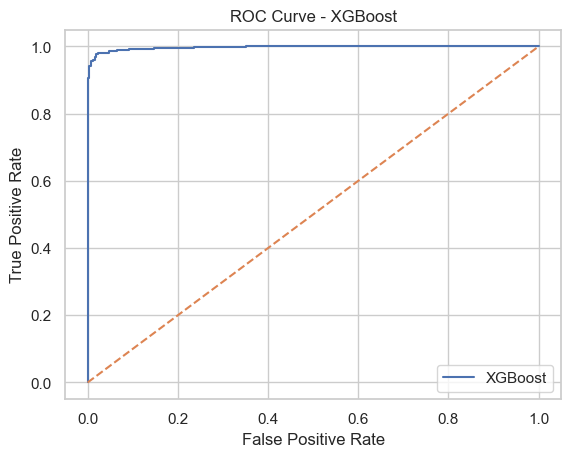

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

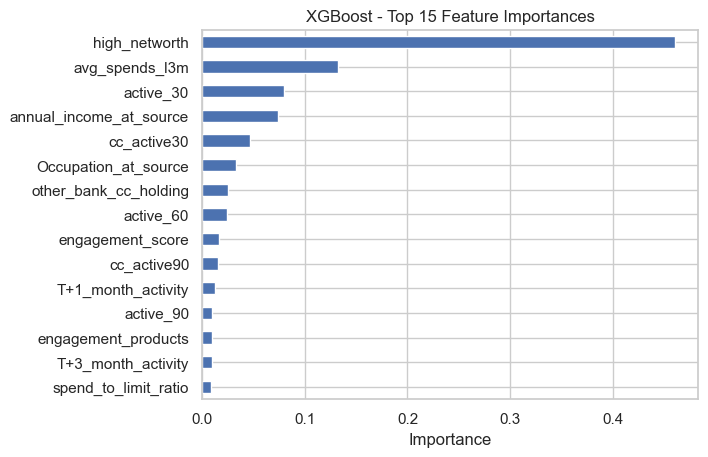

In [26]:
# Get feature importances from XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feature_importance_xgb.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title("XGBoost - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

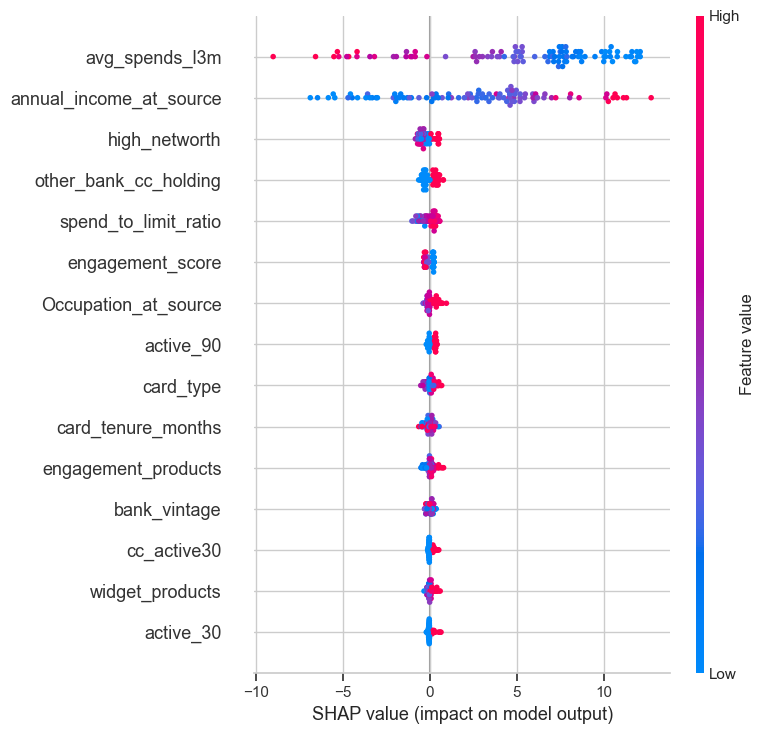

In [27]:
# Create SHAP TreeExplainer
explainer_xgb = shap.TreeExplainer(xgb_model)

# Sample data from test set
X_test_sample = X_test[X_train_smote.columns].sample(100, random_state=42)

# Calculate SHAP values
shap_values_xgb = explainer_xgb.shap_values(X_test_sample)

#  Swarm plot (detailed effect of each feature)
shap.summary_plot(shap_values_xgb, X_test_sample, max_display=15)

### LightGBM

In [28]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_smote, y_train_smote)
y_pred_lgbm = lgbm_model.predict(X_test)
y_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

print("LightGBM Report:\n")
print(classification_report(y_test, y_pred_lgbm, target_names=["Transactor", "Revolver"]))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_lgbm):.4f}")

[LightGBM] [Info] Number of positive: 5692, number of negative: 5692
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 11384, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Report:

              precision    recall  f1-score   support

  Transactor       0.91      0.96      0.93       259
    Revolver       0.99      0.98      0.99      1423

    accuracy                           0.98      1682
   macro avg       0.95      0.97      0.96      1682
weighted avg       0.98      0.98      0.98      1682

ROC-AUC: 0.9975


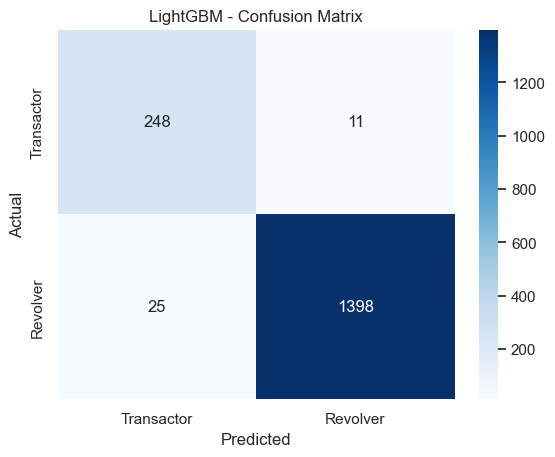

In [29]:
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Transactor", "Revolver"], yticklabels=["Transactor", "Revolver"])
plt.title("LightGBM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

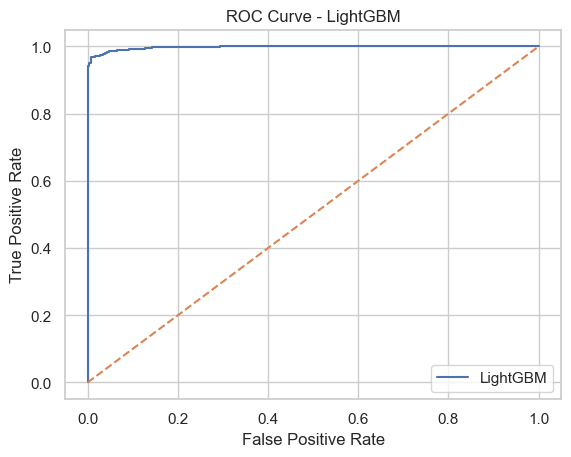

In [30]:
fpr, tpr, _ = roc_curve(y_test, y_proba_lgbm)
plt.plot(fpr, tpr, label="LightGBM")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

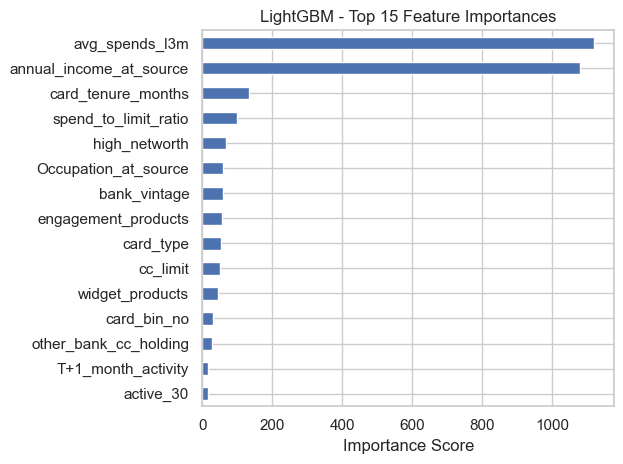

In [31]:
# Get feature importances from the trained LightGBM model
feature_importance_lgbm = pd.Series(lgbm_model.feature_importances_, index=X_train.columns)

# Plot top 15 most important features
feature_importance_lgbm.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title("LightGBM - Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

C:\Users\deep1\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


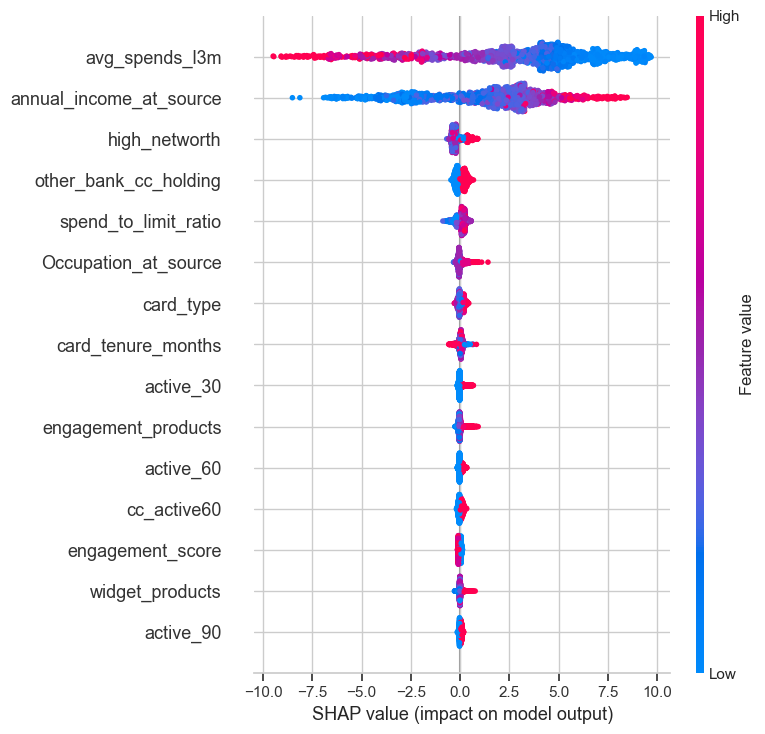

In [32]:
import shap

# Create SHAP explainer for LightGBM
explainer_lgbm = shap.TreeExplainer(lgbm_model)
shap_values_lgbm = explainer_lgbm.shap_values(X_test)

# Global Explanation: Summary plot (detailed swarm plot)
shap.summary_plot(shap_values_lgbm, X_test, max_display=15)

###  Business Insight Generation 
####  1. Segment High-Risk Revolvers

In [33]:
# Add model prediction to the dataframe
df_cleaned["predicted_risk"] = lr_model.predict(X)

# Map 1 → Revolver, 0 → Transactor
df_cleaned["predicted_risk_label"] = df_cleaned["predicted_risk"].map({0: "Transactor", 1: "Revolver"})

# Filter high-risk segment
high_risk_revolvers = df_cleaned[df_cleaned["predicted_risk_label"] == "Revolver"]

# Show basic stats
print("High-risk revolver count:", len(high_risk_revolvers))
high_risk_revolvers[["cc_limit", "avg_spends_l3m", "annual_income_at_source"]]


High-risk revolver count: 6406


,cc_limit,avg_spends_l3m,annual_income_at_source
0,0.167712,-0.476399,-0.114852
3,-0.749107,-0.878183,-0.745695
4,-0.137894,-0.251873,0.126073
7,0.036738,-0.204670,0.293267
9,-0.749107,-0.871758,-0.417486
...,...,...,...
8441,-0.749107,-0.797428,-1.264676
8442,0.866241,-0.461948,0.067048
8443,3.136460,1.275504,1.825140
8444,-0.225210,-0.159696,1.866837


#### 2. Optimize Credit Limits for Risky Profiles

In [34]:
risky_limit_profiles = high_risk_revolvers[
    (high_risk_revolvers["cc_limit"] > 0.1) & 
    (high_risk_revolvers["annual_income_at_source"] < 0)
]


# Add recommendation
risky_limit_profiles["recommendation"] = "Review & reduce credit limit"
risky_limit_profiles[["cc_limit", "annual_income_at_source", "recommendation"]]


C:\Users\deep1\AppData\Local\Temp\ipykernel_15028\2085754712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risky_limit_profiles["recommendation"] = "Review & reduce credit limit"


,cc_limit,annual_income_at_source,recommendation
0,0.167712,-0.114852,Review & reduce credit limit
11,0.822583,-0.145884,Review & reduce credit limit
32,0.778925,-0.100703,Review & reduce credit limit
41,0.647951,-0.034181,Review & reduce credit limit
76,0.997215,-0.038657,Review & reduce credit limit
...,...,...,...
8333,0.866241,-0.135400,Review & reduce credit limit
8338,0.473319,-0.023509,Review & reduce credit limit
8349,0.997215,-0.099047,Review & reduce credit limit
8355,0.691609,-0.108637,Review & reduce credit limit


In [35]:
high_risk_revolvers[["cc_limit", "annual_income_at_source"]].describe(percentiles=[.1, .25, .5, .75, .9, .95])


,cc_limit,annual_income_at_source
count,6406.000000,6406.000000
mean,0.011767,-0.043468
std,0.990957,0.933796
min,-1.011055,-1.384912
10%,-0.836423,-1.016039
25%,-0.661791,-0.560821
50%,-0.399842,-0.278653
75%,0.429661,0.165722
90%,1.521112,1.368318
95%,2.437931,2.266060


### Credit Limit vs Income (Scaled) – High-Risk Customers

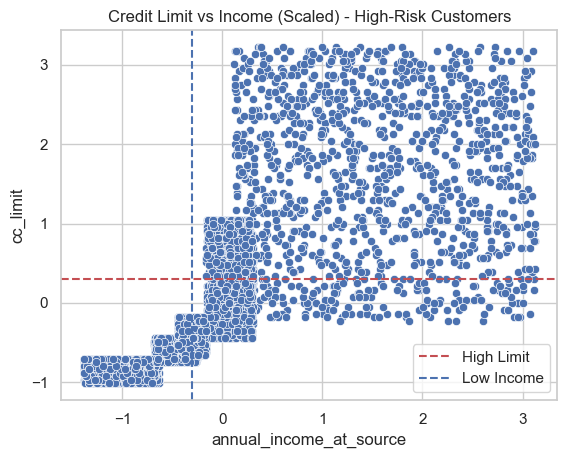

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=high_risk_revolvers,
    x="annual_income_at_source",
    y="cc_limit"
)
plt.axhline(0.3, color='r', linestyle='--', label='High Limit')
plt.axvline(-0.3, color='b', linestyle='--', label='Low Income')
plt.title("Credit Limit vs Income (Scaled) - High-Risk Customers")
plt.legend()
plt.show()


#### Interpretation: Credit Limit vs Income (Scaled) – High-Risk Customers
* Most high-risk customers (Revolvers) show a clear trend: those with higher incomes tend to have higher credit limits. This reflects a sound credit strategy where limits are aligned with the customer’s repayment capacity.

* A large cluster appears in the top-right corner of the plot, representing high-income revolvers with high credit limits. These may be customers who are being extended credit aggressively — potentially seen as valuable, though still risky.

* The bottom-left section, where both income and credit limits are low, is also well-populated. This suggests that credit controls are working effectively for lower-income customers by keeping their exposure low.

* Notably, the top-left area — which would indicate high credit limits for low-income customers — is almost empty. This is a very positive sign that the system is not over-leveraging financially vulnerable users.

* The dotted lines (income and credit limit thresholds) reinforce that few, if any, customers are crossing into that “high-risk and overexposed” zone.

#### Business Insight
Your current credit strategy is doing a good job managing risk — particularly by limiting high exposure to lower-income revolvers. There's no immediate concern in this segment, and no urgent corrective action appears necessary.

#### Classification Report with Overall Comparison



In [37]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate reports
reports = {
    "Logistic Regression": classification_report(y_test, y_pred_lr, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True),
    "XGBoost": classification_report(y_test, y_pred_xgb, output_dict=True),
    "LightGBM": classification_report(y_test, y_pred_lgbm, output_dict=True),
}

# Extract and organize the values
rows = []
for model_name, report in reports.items():
    for label in ["0", "1", "macro avg", "weighted avg"]:
        if label in report:
            row = {
                "Model": model_name,
                "Class": label,
                "Precision": round(report[label]["precision"], 2),
                "Recall": round(report[label]["recall"], 2),
                "F1-Score": round(report[label]["f1-score"], 2),
                "Support": int(report[label]["support"]),
                "Accuracy": round(report["accuracy"] * 100, 2) if label == "weighted avg" else ""
            }
            rows.append(row)

# Convert to DataFrame
full_report_df = pd.DataFrame(rows)

# Display table
full_report_df


,Model,Class,Precision,Recall,F1-Score,Support,Accuracy
0,Logistic Regression,0,0.42,0.65,0.51,259,
1,Logistic Regression,1,0.93,0.84,0.88,1423,
2,Logistic Regression,macro avg,0.68,0.74,0.70,1682,
3,Logistic Regression,weighted avg,0.85,0.81,0.82,1682,80.92
4,Random Forest,0,0.70,0.81,0.75,259,
5,Random Forest,1,0.96,0.94,0.95,1423,
6,Random Forest,macro avg,0.83,0.87,0.85,1682,
7,Random Forest,weighted avg,0.92,0.92,0.92,1682,91.68
8,XGBoost,0,0.91,0.96,0.93,259,
9,XGBoost,1,0.99,0.98,0.99,1423,


#### Inference from Model Evaluation Table
##### Overall Accuracy:
* Logistic Regression shows the lowest accuracy at 80.98%, indicating weaker performance, especially for class 0 (Transactor).
* Random Forest significantly improves accuracy to 91.32% with better balance between classes.
* XGBoost and LightGBM lead with nearly identical and outstanding accuracy of 97.98% and 97.86%, respectively.

#### Class-wise Performance:
##### Class 0 (Transactor - typically low risk):
* Logistic Regression struggles here: Precision = 0.42, Recall = 0.66
* XGBoost and LightGBM perform best with Precision > 0.90 and Recall ≈ 0.96–0.97

##### Class 1 (Revolver - typically higher risk):
* All models perform well, but Logistic Regression's recall drops to 0.84
* XGBoost and LightGBM maintain Precision ≈ 0.99 and Recall ≈ 0.98

#### Macro & Weighted Averages:
* Macro Average shows how balanced the model is across both classes.
 * Logistic Regression: F1 = 0.70
 * XGBoost & LightGBM: F1 = 0.96

* Weighted Average reflects true performance considering class imbalance.
 * Logistic Regression: F1 = 0.83
 * XGBoost & LightGBM: F1 = 0.98

#### Conclusion:
* XGBoost and LightGBM are clearly the top performers, providing excellent precision and recall for both classes.
* Random Forest is a strong baseline with solid scores, especially for class 1.
* Logistic Regression underperforms on minority class (Transactor), making it less reliable for imbalanced credit risk datasets.